<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-02 04:46:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.5’

survey-results-publ 100%[===================>] 201.62M  81.6MB/s    in 2.5s    

2025-06-02 04:46:06 (81.6 MB/s) - ‘survey-results-public.sqlite.5’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 124.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 148.4 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

pd.get_option("display.max_columns") 

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [8]:
query = """ 
SELECT * FROM main
"""

df_all = pd.read_sql_query(query,conn) 
pd.get_option("display.max_columns") 
df_all.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [9]:
[col for col in df_all.columns if "year" in col.lower()]

['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']

## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [10]:
# your code goes here
QUERy = """ 
SELECT Comptotal 
FROM main
WHERE Comptotal IS NOT NULL
""" 

df_comptotal = pd.read_sql_query(QUERy, conn)
df_comptotal

,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


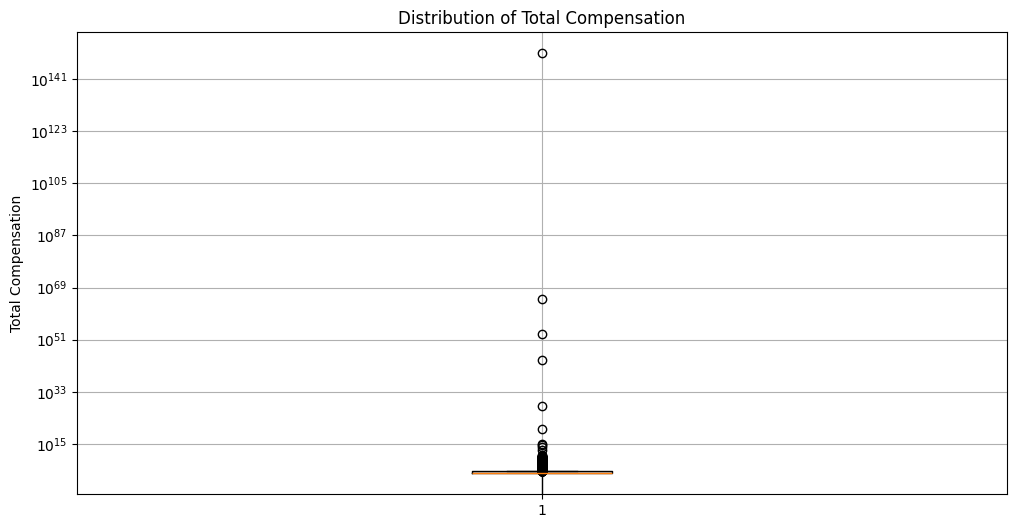

In [10]:
plt.figure(figsize=(12,6))

plt.boxplot(df_comptotal["CompTotal"])

plt.title("Distribution of Total Compensation")
plt.ylabel("Total Compensation")
plt.yscale("log")
plt.grid("True")
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [11]:
# your code goes here
QUEry = """ 
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""

df_age = pd.read_sql_query(QUEry, conn)
df_age["Age"].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [12]:
!pip install numpy
import numpy as np

age_map = {'Under 18 years old': 17, 
           '35-44 years old': 39.50, 
           '45-54 years old': 49.50,
           '18-24 years old': 21, 
           '25-34 years old': 29.50, 
           '55-64 years old': 59.50,
           'Prefer not to say': np.nan, 
           '65 years or older': 67}

df_age["Age"] = df_age["Age"].map(age_map)
df_age.value_counts()

Age 
29.5    23911
39.5    14942
21.0    14098
49.5     6249
59.5     2575
17.0     2568
67.0      772
Name: count, dtype: int64

In [13]:
print(df_age["Age"].dropna().values[:10])  # sample of what you're plotting


[17.  39.5 49.5 21.  21.  17.  39.5 21.  49.5 39.5]


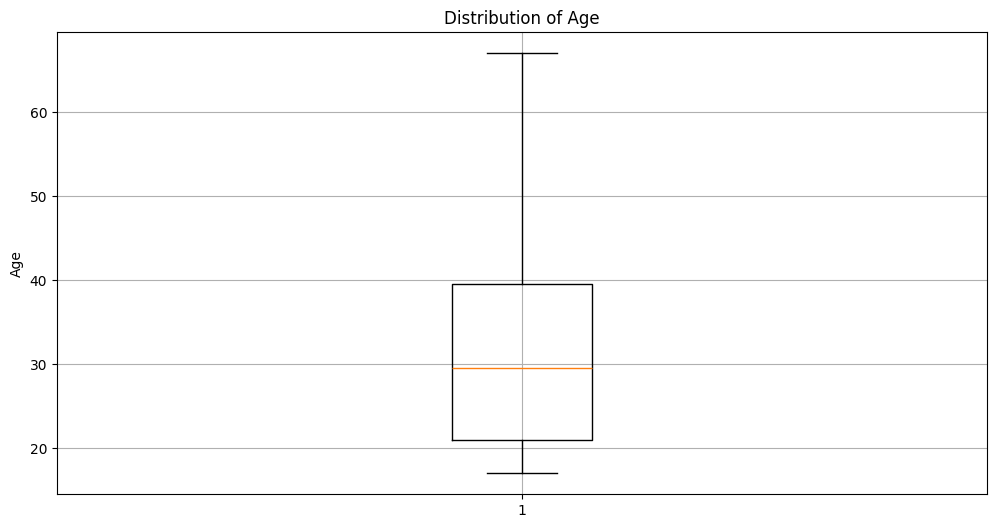

In [14]:
plt.figure(figsize=(12,6))

plt.boxplot(df_age["Age"].dropna().values)
plt.title("Distribution of Age")
plt.ylabel("Age")
plt.grid("True")

plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [14]:
# your code goes here

querY = """ 
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL
AND Age IS NOT NULL
GROUP BY Age
""" 

comptotal_age = pd.read_sql_query(querY, conn)
comptotal_age

,CompTotal,Age
0,2040000.0,18-24 years old
1,28000.0,25-34 years old
2,85000.0,35-44 years old
3,95000.0,45-54 years old
4,54000.0,55-64 years old
5,43000.0,65 years or older
6,140000.0,Prefer not to say
7,1100.0,Under 18 years old


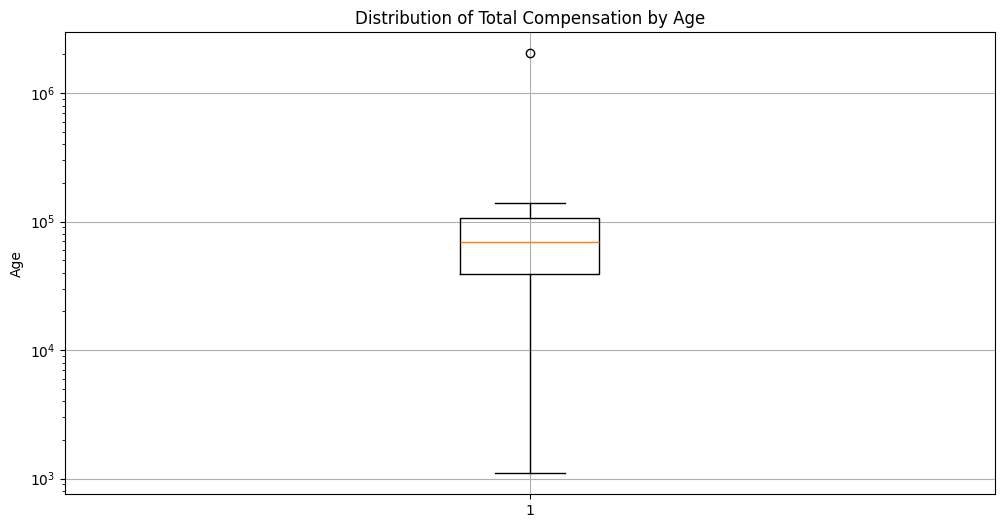

In [15]:
plt.figure(figsize=(12,6))

plt.boxplot(comptotal_age[["CompTotal"]])
plt.title("Distribution of Total Compensation by Age")
plt.ylabel("Age")
plt.grid(True)
plt.yscale("log")
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [16]:
# your code goes here
QuEry = """ 
SELECT CompTotal, JobSatPoints_6 AS JobSatisfaction
FROM main
WHERE CompTotal IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""

comp_jobsat = pd.read_sql_query(QuEry, conn)
comp_jobsat

,CompTotal,JobSatisfaction
0,2040000.0,65.0
1,85000.0,0.0
2,110000.0,20.0
3,126420.0,30.0
4,195000.0,30.0
...,...,...
22473,40000.0,20.0
22474,46000.0,50.0
22475,81600.0,20.0
22476,500000.0,0.0


/tmp/ipykernel_301/932617374.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=groups.index.astype(int))


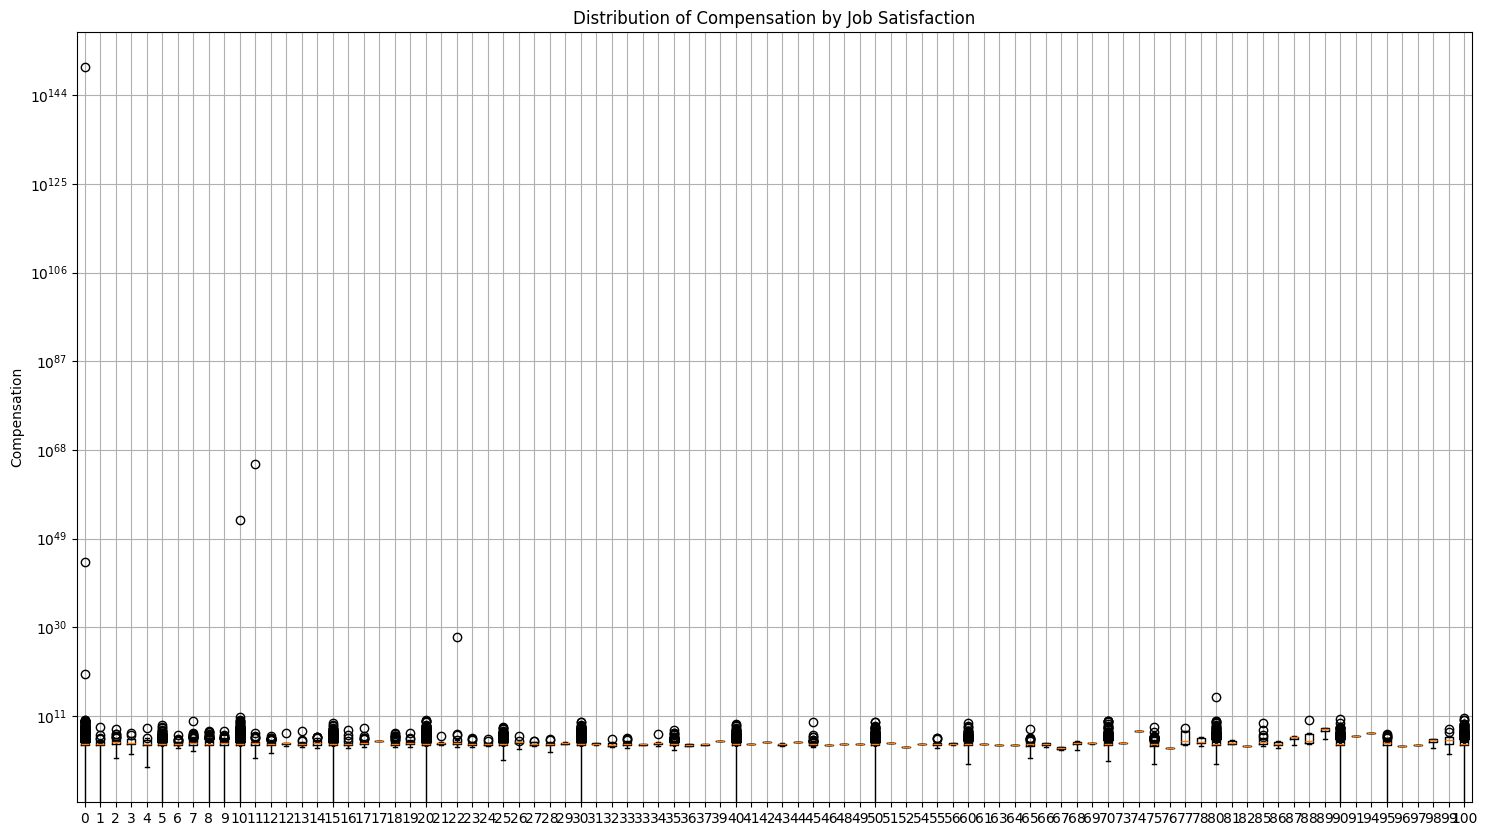

In [17]:

groups = comp_jobsat.groupby("JobSatisfaction")["CompTotal"].apply(list)

plt.figure(figsize=(18,10))

plt.boxplot(groups, labels=groups.index.astype(int))
plt.title("Distribution of Compensation by Job Satisfaction")
plt.ylabel("Compensation")
plt.yscale("log")
plt.grid(True)

plt.show() 

/tmp/ipykernel_301/1297236226.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=groups.index.astype(int), showfliers=False)


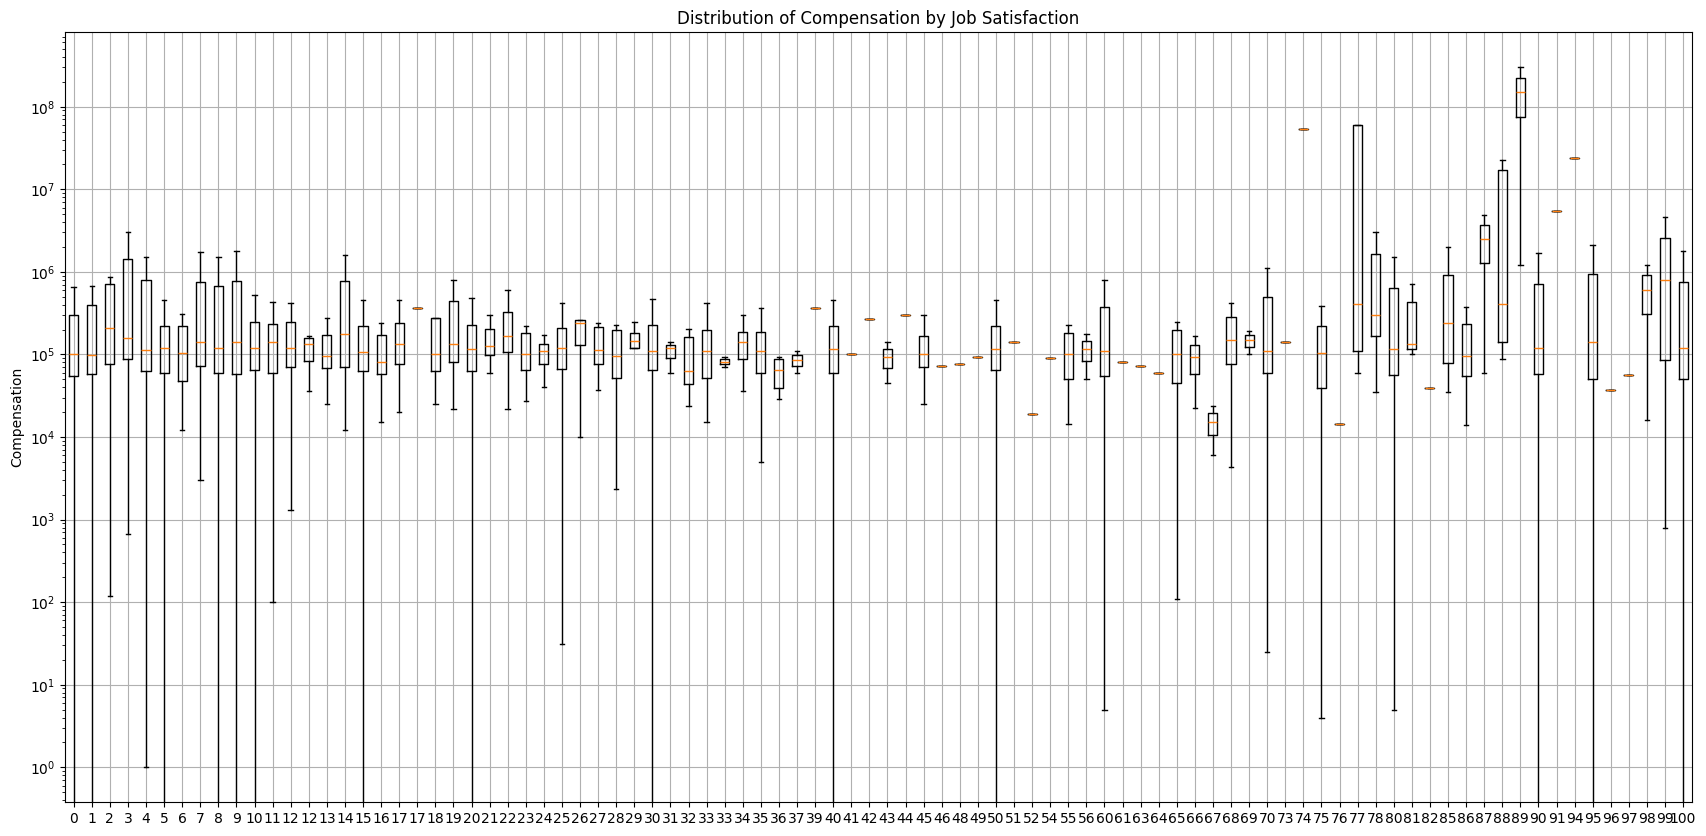

In [18]:

groups = comp_jobsat.groupby("JobSatisfaction")["CompTotal"].apply(list)

plt.figure(figsize=(21, 10))

plt.boxplot(groups, labels=groups.index.astype(int), showfliers=False)
plt.title("Distribution of Compensation by Job Satisfaction")
plt.ylabel("Compensation")
plt.yscale("log")
plt.grid(True)

plt.show() 


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [26]:
# your code goes here
queRy = """ 
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""

df2 = pd.read_sql_query(queRy, conn) 
df2 

,ConvertedCompYearly,DevType
0,7322.0,Data scientist or machine learning specialist
1,30074.0,Academic researcher
2,91295.0,Data scientist or machine learning specialist
3,53703.0,"Developer, back-end"
4,110000.0,Student
...,...,...
23430,44640.0,"Developer, embedded applications or devices"
23431,170000.0,Project manager
23432,116844.0,"Developer, full-stack"
23433,12000.0,"Developer, full-stack"


In [27]:
df2["DevType"] = df2["DevType"].str.split(";")
df2_exploded = df2.explode("DevType")
df2_exploded["DevType"] = df2_exploded["DevType"].str.strip()
df2_compdev = df2_exploded

df2_compdev 

,ConvertedCompYearly,DevType
0,7322.0,Data scientist or machine learning specialist
1,30074.0,Academic researcher
2,91295.0,Data scientist or machine learning specialist
3,53703.0,"Developer, back-end"
4,110000.0,Student
...,...,...
23430,44640.0,"Developer, embedded applications or devices"
23431,170000.0,Project manager
23432,116844.0,"Developer, full-stack"
23433,12000.0,"Developer, full-stack"


/tmp/ipykernel_301/2214429142.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_plot, labels=top_5)


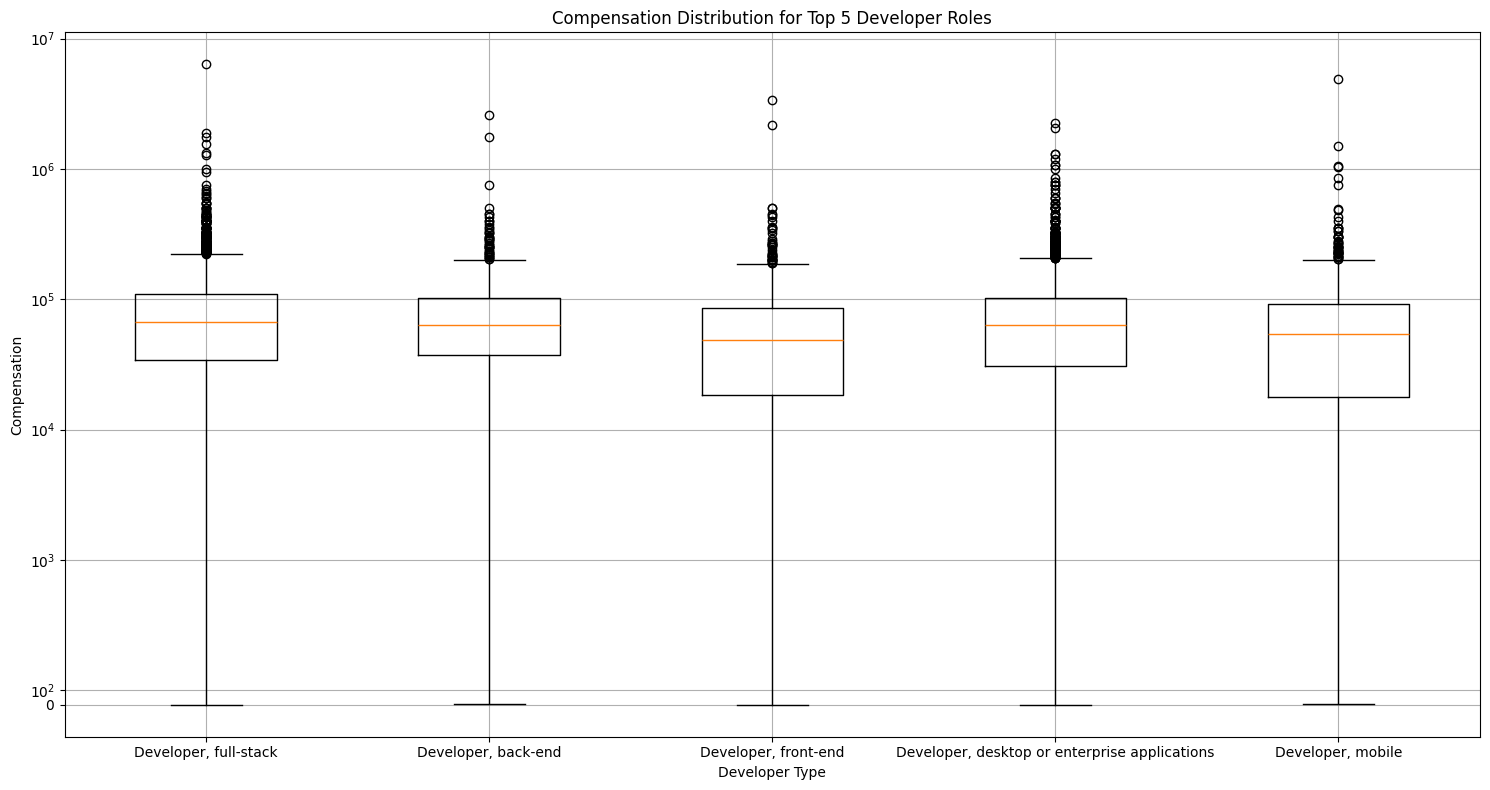

In [28]:
top_5 = df2_exploded["DevType"].value_counts().head().index

df_filtered = df2_compdev[df2_compdev["DevType"].isin(top_5)]

df_plot = [group["ConvertedCompYearly"].values for i, group in df_filtered.groupby("DevType")]

plt.figure(figsize=(15, 8))

plt.boxplot(df_plot, labels=top_5)
plt.title("Compensation Distribution for Top 5 Developer Roles") 
plt.ylabel("Compensation")
plt.xlabel("Developer Type")
plt.yscale("symlog", linthresh=1000)
plt.grid(True)


plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [30]:
# your code goes here
qUery = """ 
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL
AND Country IS NOT NULL
"""

comp_percountry = pd.read_sql_query(qUery, conn)    

comp_percountry.head() 

,CompTotal,Country
0,2040000.0,Pakistan
1,28000.0,Austria
2,85000.0,Turkey
3,50000.0,France
4,110000.0,United States of America


/tmp/ipykernel_301/1410818160.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_bycountry, labels=top5_countries)


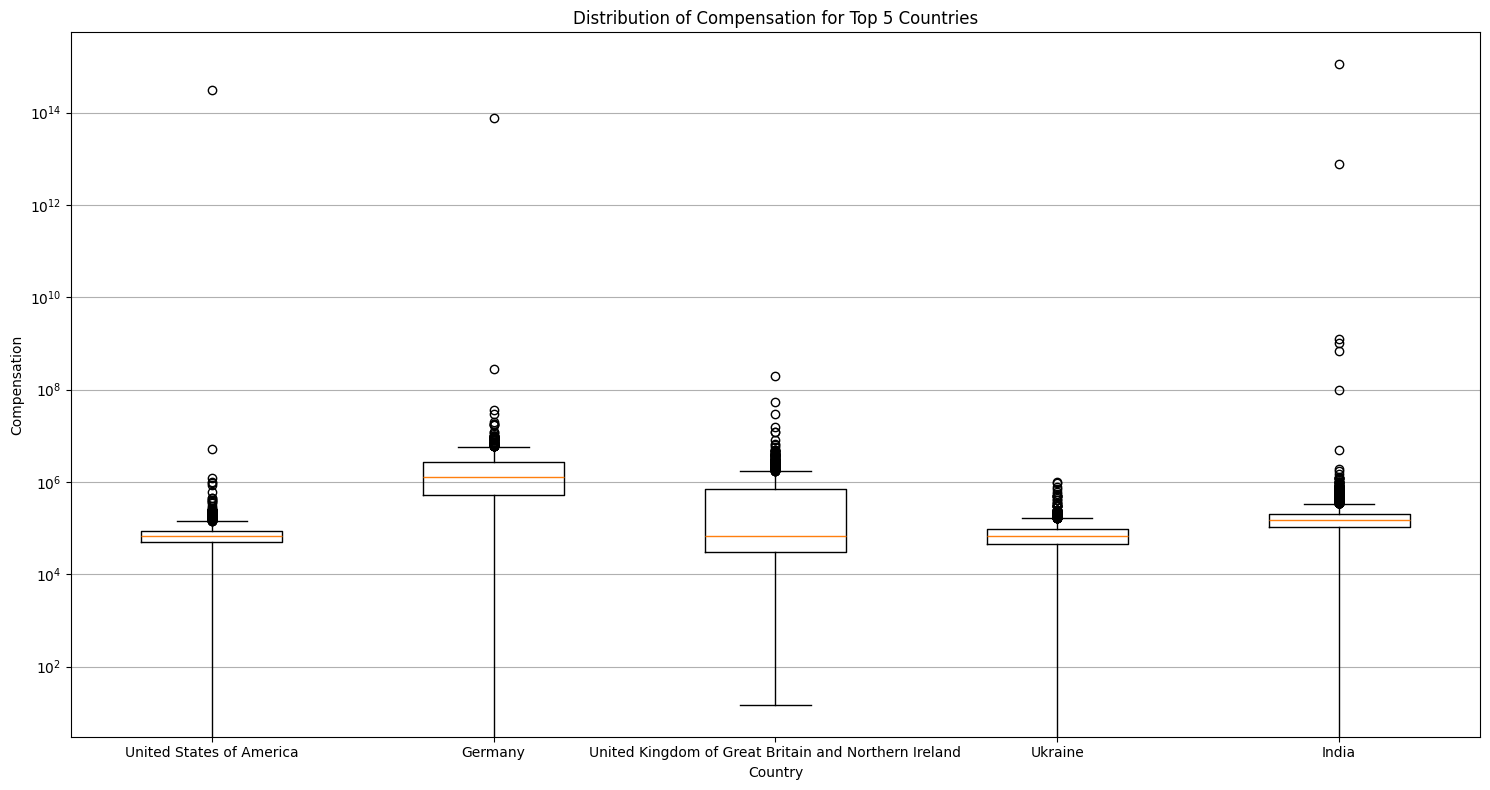

In [32]:
top5_countries = comp_percountry["Country"].value_counts().head(5).index

filtered_bycountry = comp_percountry[comp_percountry["Country"].isin(top5_countries)] 

grouped_bycountry = [group["CompTotal"].values for col, group in filtered_bycountry.groupby("Country")]

plt.figure(figsize=(15,8))
plt.boxplot(grouped_bycountry, labels=top5_countries)
plt.title("Distribution of Compensation for Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Compensation")
plt.yscale("log")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [73]:
# your code goes here
QuEry = """ 
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL
AND Employment IS NOT NULL
"""

df3 = pd.read_sql_query(QuEry, conn)
df3

,CompTotal,Employment
0,2040000.0,"Employed, full-time;Student, full-time;Indepen..."
1,28000.0,"Employed, full-time"
2,85000.0,"Employed, full-time"
3,50000.0,"Independent contractor, freelancer, or self-em..."
4,110000.0,"Employed, full-time;Student, part-time"
...,...,...
33735,36000.0,"Employed, full-time;Independent contractor, fr..."
33736,40000.0,"Employed, full-time"
33737,61000.0,"Employed, full-time"
33738,58000.0,"Employed, full-time"


In [74]:
df3["Employment"].isna().sum() 

np.int64(0)

In [75]:
df3["CompTotal"].isna().sum() 

np.int64(0)

In [76]:
df3["Employment"] = df3["Employment"].str.split(";")
df3_exploded = df3.explode("Employment")
df3_exploded["Employment"] = df3_exploded["Employment"].str.strip() 
df3_exploded["Employment"].unique()

array(['Employed, full-time', 'Student, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time', 'Student, part-time', 'Retired',
       'Not employed, but looking for work',
       'Not employed, and not looking for work'], dtype=object)

In [77]:
df3_exploded.isna().sum()

CompTotal     0
Employment    0
dtype: int64

In [78]:
map_emp = {
       'Employed, full-time': 'Employed, full-time', 
       'Student, full-time': 'Student, full-time',
       'Employed, part-time': 'Employed, part-time', 
       'Student, part-time': 'Student, part-time', 
       'Retired': 'Retired',
       'Not employed, but looking for work': 'Not employed\nlooking for work',
       'Not employed, and not looking for work': 'Not employed\nnot looking\nfor work'    
}

df3_exploded["Employment"] = df3_exploded["Employment"].map(map_emp)

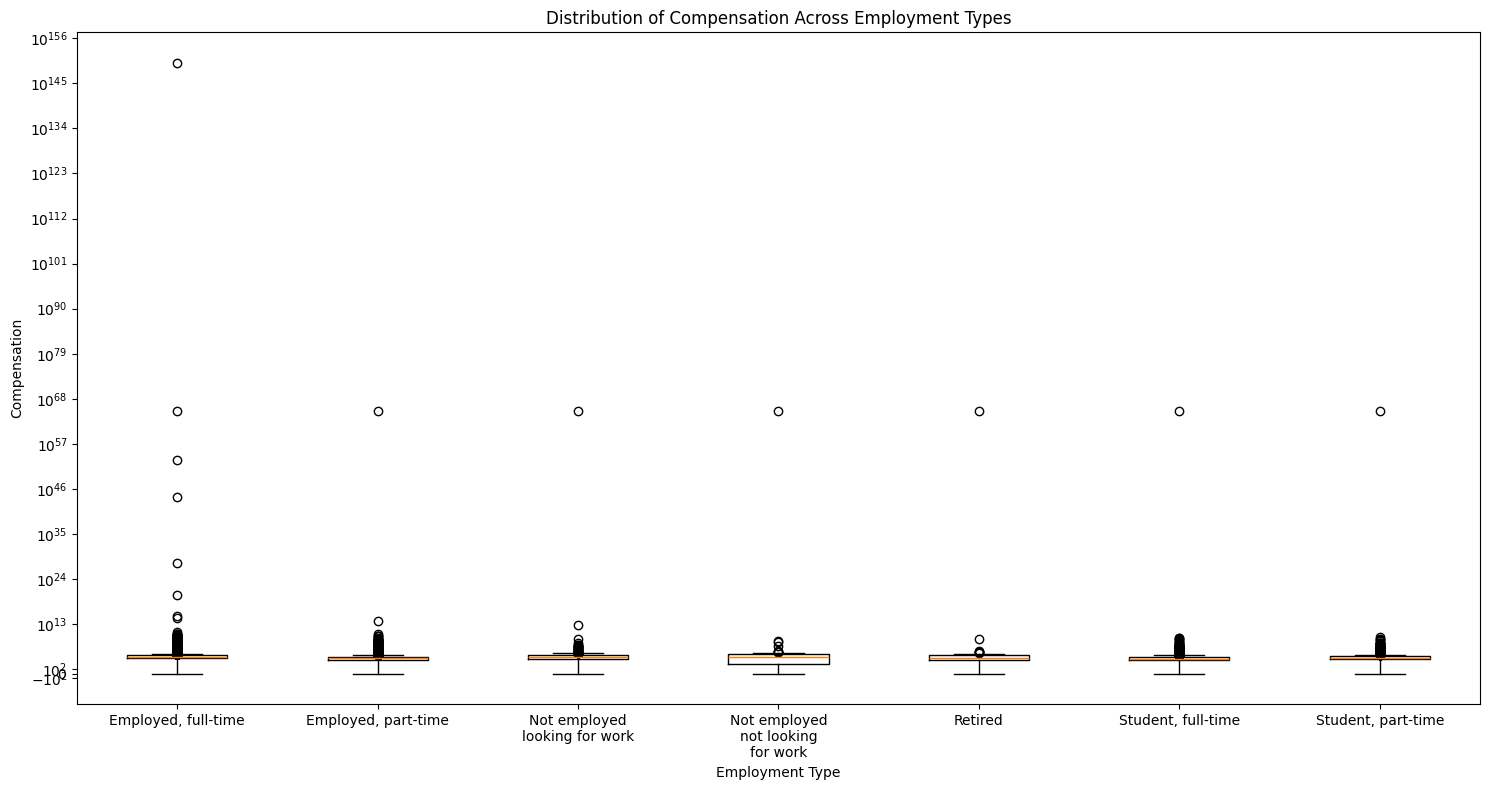

In [95]:
data_to_plot = [group["CompTotal"].dropna().values 
                for i, group in df3_exploded.groupby("Employment")]

tick_labels = list(df3_exploded.groupby("Employment").groups.keys())

plt.figure(figsize=(15,8)) 
plt.boxplot(data_to_plot, tick_labels = tick_labels)  
plt.title("Distribution of Compensation Across Employment Types")
plt.ylabel("Compensation") 
plt.xlabel("Employment Type") 
plt.yscale("symlog", linthresh=100) 
plt.tight_layout() 
plt.show() 

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [33]:
# your code goes here
QuErY = """   
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""

df_4 = pd.read_sql_query(QuErY,conn) 
df_4 


,YearsCodePro,JobSatPoints_6
0,17,0.0
1,12,30.0
2,27,0.0
3,10,60.0
4,Less than 1 year,100.0
...,...,...
28614,2,0.0
28615,17,0.0
28616,2,60.0
28617,7,0.0


In [34]:
df_4.dtypes

YearsCodePro       object
JobSatPoints_6    float64
dtype: object

In [35]:
df_4["YearsCodePro"].unique()

array(['17', '12', '27', '10', 'Less than 1 year', '18', '15', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [36]:
df_4["JobSatPoints_6"].unique()

array([  0.  ,  30.  ,  60.  , 100.  ,  20.  ,  25.  ,  50.  ,  15.  ,
        10.  ,   5.  ,  80.  ,  65.  ,   8.  ,  90.  ,  75.  ,  35.  ,
        40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,   9.  ,
        21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,  78.  ,
        85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,  81.  ,
         6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,  89.  ,
        99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,  88.  ,
        29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,  26.  ,
        98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,  43.  ,
        69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,  97.  ,
        96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,  51.  ,
        48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

In [37]:
df_4["YearsCodePro"]= (df_4["YearsCodePro"].replace({
                                             'Less than 1 year': 0,
                                             'More than 50 years': 51
                                                         }).astype(int))
df_4["YearsCodePro"].unique()

array([17, 12, 27, 10,  0, 18, 15,  6,  7, 16, 14,  4,  8,  2, 29,  5, 30,
        1, 25, 24, 26,  9, 20, 37, 11,  3, 13, 19, 21, 23, 34, 28, 32, 22,
       33, 40, 39, 31, 35, 41, 38, 51, 36, 43, 42, 50, 45, 44, 46, 48, 47,
       49])

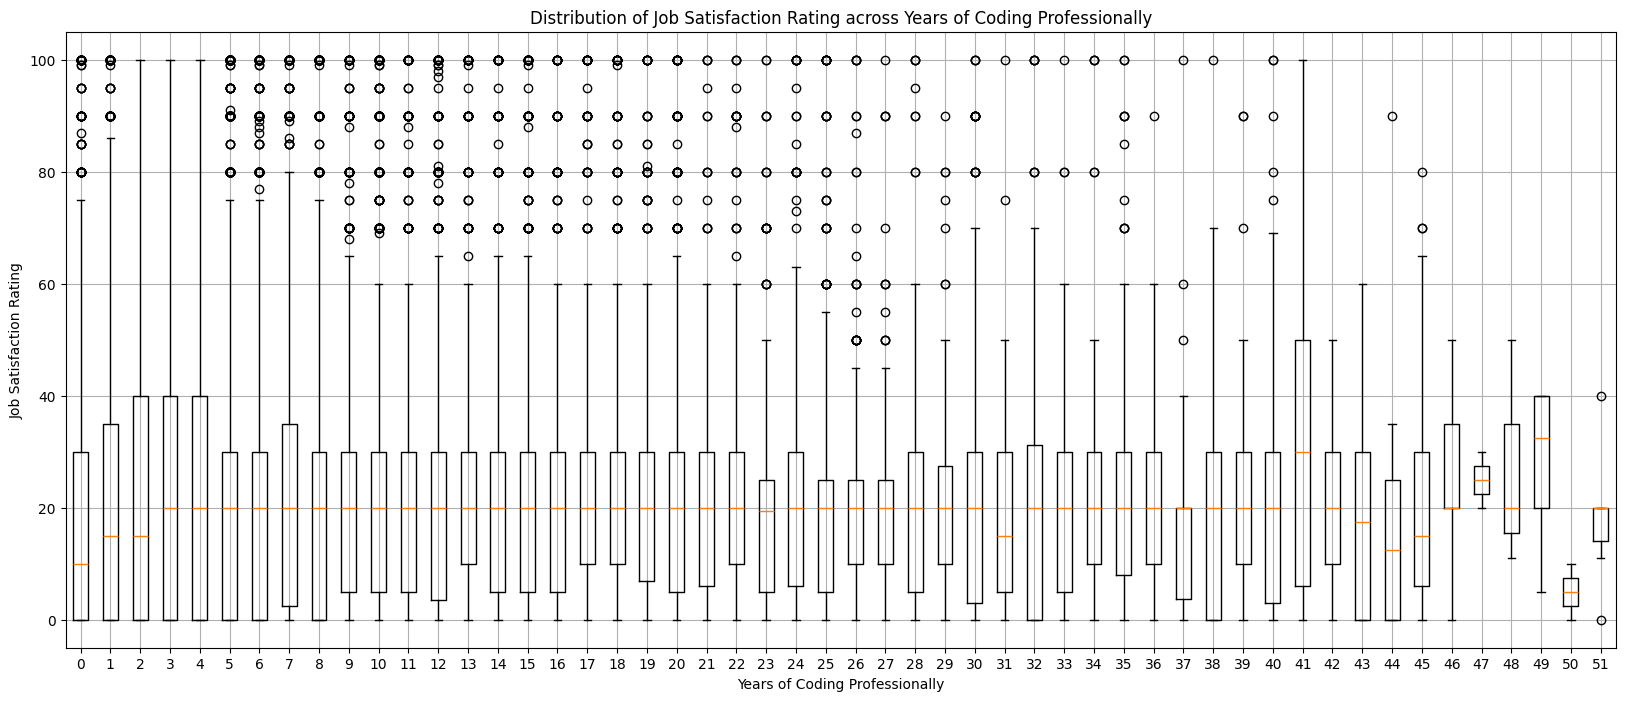

In [38]:
data_to_plot = [group["JobSatPoints_6"].dropna().values 
                for i, group in df_4.groupby("YearsCodePro")]
labels = list(df_4.groupby("YearsCodePro").groups.keys())

plt.figure(figsize=(20,8)) 
plt.boxplot(data_to_plot, tick_labels=labels) 
plt.title("Distribution of Job Satisfaction Rating across Years of Coding Professionally")
plt.ylabel("Job Satisfaction Rating")
plt.xlabel("Years of Coding Professionally")

plt.grid(True)
plt.show() 

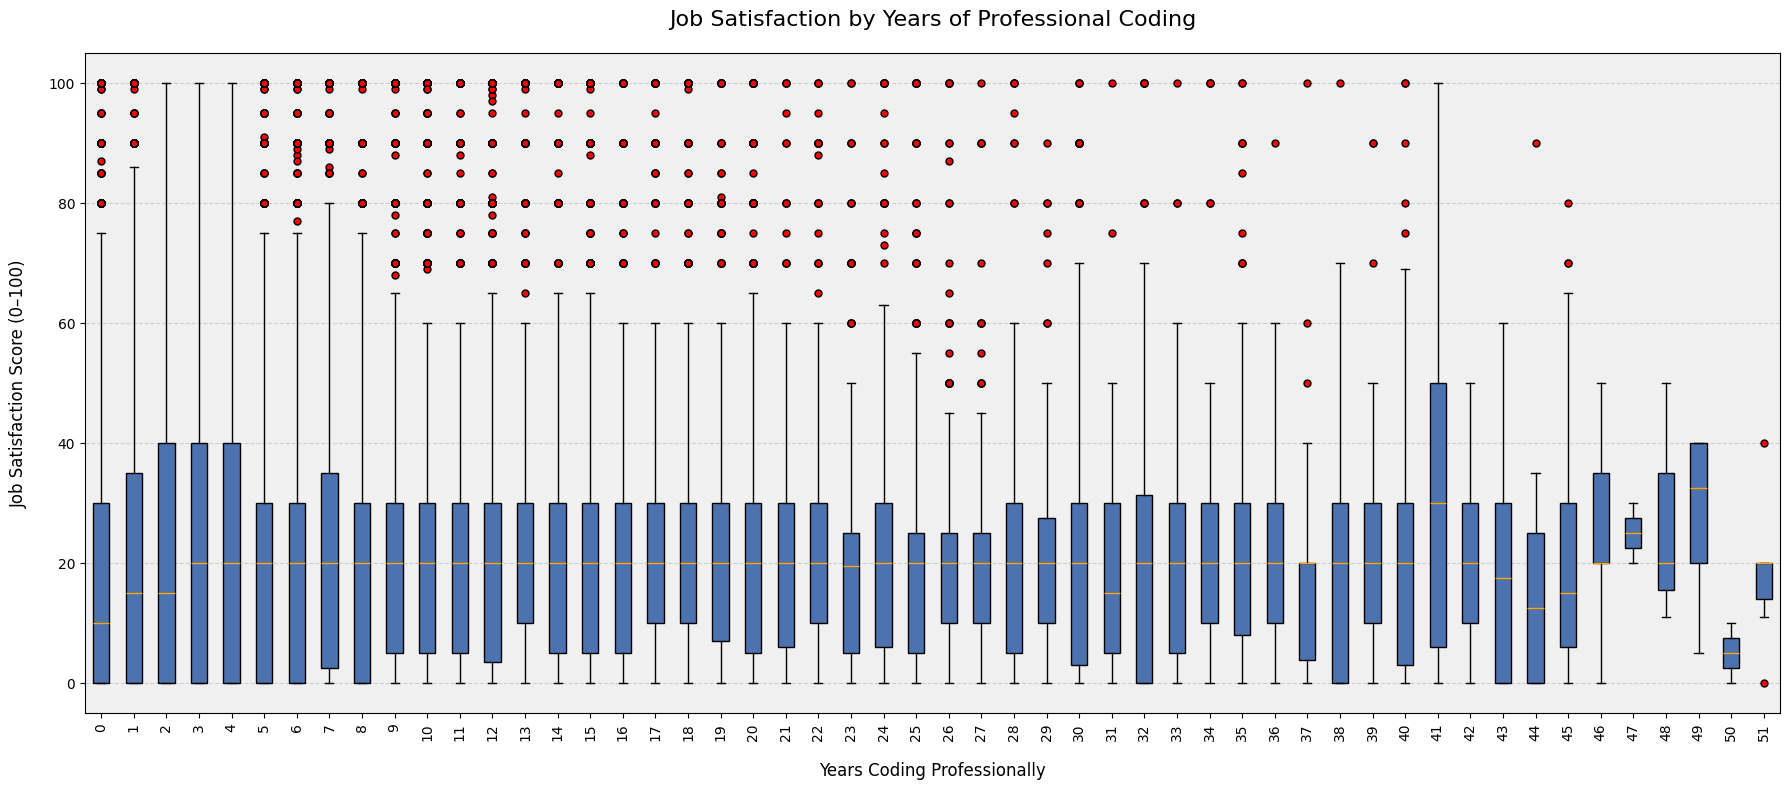

In [39]:
import matplotlib.pyplot as plt


data_to_plot = [group["JobSatPoints_6"].dropna().values 
                for _, group in df_4.groupby("YearsCodePro")]
labels = list(df_4.groupby("YearsCodePro").groups.keys())


plt.figure(figsize=(18, 8))
ax = plt.gca()
ax.set_facecolor("#f0f0f0") 
plt.grid(True, axis='y', linestyle='--', alpha=0.5)


box = plt.boxplot(data_to_plot,
                  patch_artist=True,       
                  boxprops=dict(facecolor="#4C72B0", color="black"),
                  capprops=dict(color="black"),
                  whiskerprops=dict(color="black"),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'),
                  medianprops=dict(color='orange'),
                  )

plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=90)
plt.title("Job Satisfaction by Years of Professional Coding", fontsize=16, pad=20)
plt.xlabel("Years Coding Professionally", fontsize=12, labelpad=15)
plt.ylabel("Job Satisfaction Score (0–100)", fontsize=12, labelpad=15)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [40]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
